In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os
conn = sqlite3.connect('../../db/proyectomacro.db')
df_pib = pd.read_sql_query("SELECT * FROM pib_real_gasto", conn)
df_minerales = pd.read_sql_query("SELECT * FROM exportaciones_minerales_totales", conn)
df_balanza_comercial = pd.read_sql_query("SELECT * FROM balanza_comercial", conn)

df_grado_de_apertura=pd.read_sql_query("SELECT * FROM grado_de_apertura", conn)
df_participacion_x_m_pib=pd.read_sql_query("SELECT * FROM participacion_x_m_pib", conn)
df_reservas_internacionales=pd.read_sql_query("SELECT * FROM Reservas_oro_divisas", conn)
df_tasa_de_crecimiento=pd.read_sql_query("SELECT * FROM Tasa_Crecimiento_PIB", conn)
df_precios_minerales=pd.read_sql_query("SELECT * FROM precio_oficial_minerales", conn)
# Ruta principal donde se guardarán todas las gráficas
output_dir = "../../graficas+"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Subcarpetas para cada período
output_subdir_pre = os.path.join(output_dir, "1952-1956")
output_subdir_post = os.path.join(output_dir, "1956-1982")

if not os.path.exists(output_subdir_pre):
    os.makedirs(output_subdir_pre)
if not os.path.exists(output_subdir_post):
    os.makedirs(output_subdir_post)

In [2]:
# Establecer el índice como 'año'
df_pib.set_index('año', inplace=True)
df_minerales.set_index('año', inplace=True)
df_precios_minerales.set_index('año', inplace=True)
df_reservas_internacionales.set_index('año', inplace=True)
df_balanza_comercial.set_index('año', inplace=True)

df_pib=df_pib/1000
df_reservas_internacionales=df_reservas_internacionales
# Definir periodos
pre_start, pre_end = 1952, 1956
post_start, post_end = 1956, 1982

# Filtrar datos utilizando .loc (ya que el índice es 'año')
df_pib_pre = df_pib.loc[pre_start:pre_end]
df_pib_post = df_pib.loc[post_start:post_end]

df_reservas_pre = df_reservas_internacionales.loc[pre_start:pre_end]
df_reservas_post = df_reservas_internacionales.loc[post_start:post_end]

# Filtrar datos para los periodos pre y post crisis
df_precios_pre = df_precios_minerales.loc[pre_start:pre_end]
df_precios_post = df_precios_minerales.loc[post_start:post_end]

# Filtrar los datos de la balanza comercial
df_balanza_comercial_pre = df_balanza_comercial.loc[pre_start:pre_end]
df_balanza_comercial_post = df_balanza_comercial.loc[post_start:post_end]

# Calcular 'valor_total' para exportaciones minerales
valor_columns = ['estaño_valor', 'plomo_valor', 'zinc_valor', 'plata_valor', 
                 'wolfram_valor', 'cobre_valor', 'antimonio_valor', 'oro_valor']
df_minerales['valor_total'] = df_minerales[valor_columns].sum(axis=1)
df_minerales['valor_total']=df_minerales['valor_total']/1000

df_minerales_pre = df_minerales.loc[pre_start:pre_end]
df_minerales_post = df_minerales.loc[post_start:post_end]

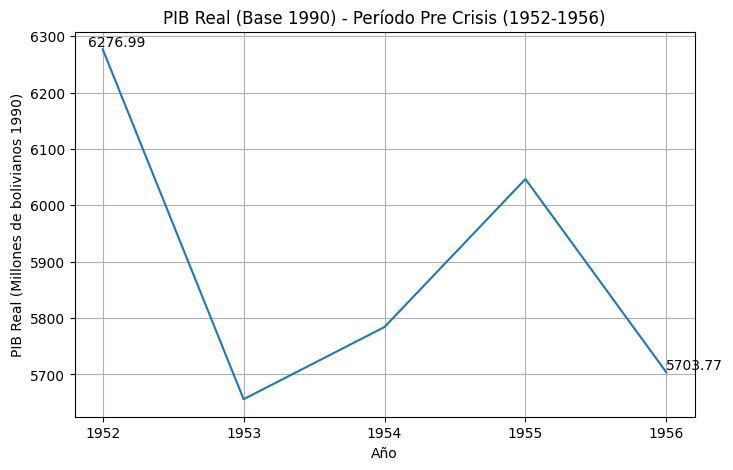

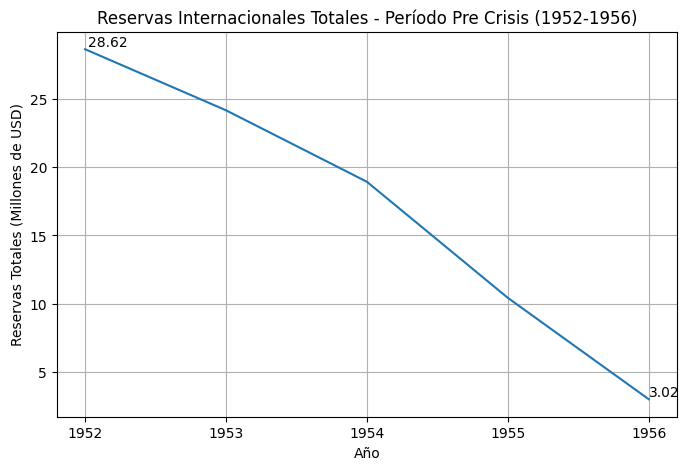

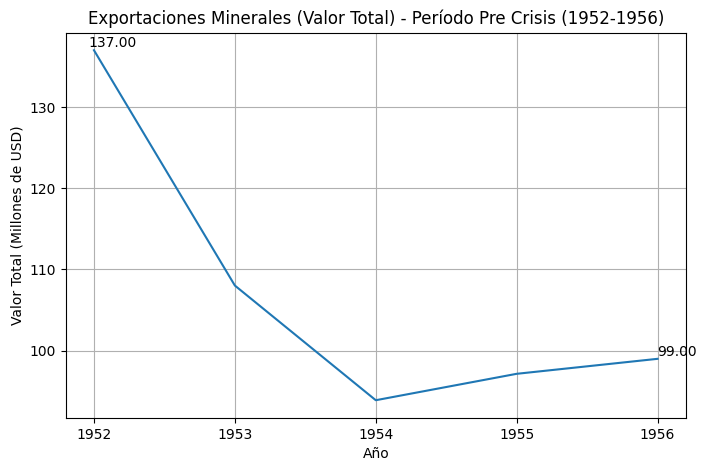

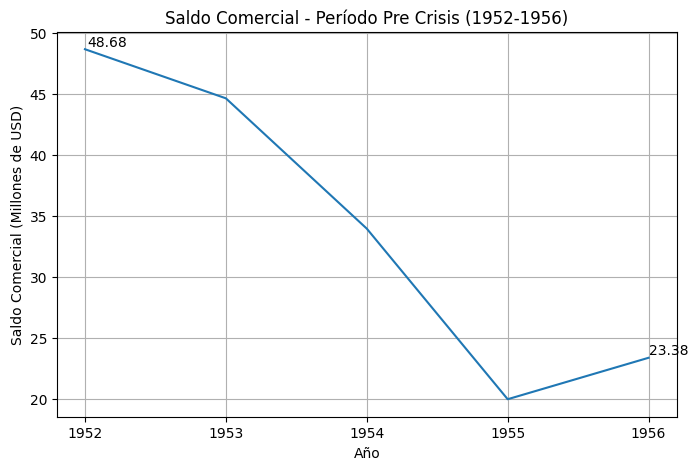

In [3]:
# ----------------------------------------------------------------------------
# CARPETA 1952-1956
# ----------------------------------------------------------------------------

# Gráfica 1: PIB Real (Pre Crisis)
plt.figure(figsize=(8, 5))
plt.plot(df_pib_pre.index, df_pib_pre['pib_real_base_1990'], linestyle='-')
plt.title('PIB Real (Base 1990) - Período Pre Crisis (1952-1956)')
plt.xlabel('Año')
plt.ylabel('PIB Real (Millones de bolivianos 1990)')
plt.grid(True)
plt.xticks(df_pib_pre.index)
# Anotaciones manuales
inicio = df_pib_pre.index[0]
fin = df_pib_pre.index[-1]
valor_inicio = df_pib_pre['pib_real_base_1990'].iloc[0]
valor_fin = df_pib_pre['pib_real_base_1990'].iloc[-1]
plt.text(inicio + 0.3, valor_inicio, f'{valor_inicio:.2f}',
         fontsize=10, verticalalignment='bottom', horizontalalignment='right')
plt.text(fin, valor_fin, f'{valor_fin:.2f}',
         fontsize=10, verticalalignment='bottom', horizontalalignment='left')

# Guardar figura
plt.savefig(os.path.join(output_subdir_pre, "PIB_Real_pre.png"))
plt.show()

# Gráfica 2: Reservas Internacionales (Pre Crisis)
plt.figure(figsize=(8, 5))
plt.plot(df_reservas_pre.index, df_reservas_pre['reservas_totales'], linestyle='-')
plt.title('Reservas Internacionales Totales - Período Pre Crisis (1952-1956)')
plt.xlabel('Año')
plt.ylabel('Reservas Totales (Millones de USD)')
plt.grid(True)
plt.xticks(df_reservas_pre.index)
# Anotaciones manuales
inicio = df_reservas_pre.index[0]
fin = df_reservas_pre.index[-1]
valor_inicio = df_reservas_pre['reservas_totales'].iloc[0]
valor_fin = df_reservas_pre['reservas_totales'].iloc[-1]
plt.text(inicio + 0.3, valor_inicio, f'{valor_inicio:.2f}',
         fontsize=10, verticalalignment='bottom', horizontalalignment='right')
plt.text(fin, valor_fin, f'{valor_fin:.2f}',
         fontsize=10, verticalalignment='bottom', horizontalalignment='left')

# Guardar figura
plt.savefig(os.path.join(output_subdir_pre, "Reservas_pre.png"))
plt.show()

# Gráfica 3: Exportaciones Minerales (Pre Crisis)
plt.figure(figsize=(8, 5))
plt.plot(df_minerales_pre.index, df_minerales_pre['valor_total'], linestyle='-')
plt.title('Exportaciones Minerales (Valor Total) - Período Pre Crisis (1952-1956)')
plt.xlabel('Año')
plt.ylabel('Valor Total (Millones de USD)')
plt.grid(True)
plt.xticks(df_minerales_pre.index)
# Anotaciones manuales
inicio = df_minerales_pre.index[0]
fin = df_minerales_pre.index[-1]
valor_inicio = df_minerales_pre['valor_total'].iloc[0]
valor_fin = df_minerales_pre['valor_total'].iloc[-1]
plt.text(inicio + 0.3, valor_inicio, f'{valor_inicio:.2f}',
         fontsize=10, verticalalignment='bottom', horizontalalignment='right')
plt.text(fin, valor_fin, f'{valor_fin:.2f}',
         fontsize=10, verticalalignment='bottom', horizontalalignment='left')

# Guardar figura
plt.savefig(os.path.join(output_subdir_pre, "Minerales_pre.png"))
plt.show()

# Gráfica 4: Saldo Comercial (Pre Crisis)
plt.figure(figsize=(8, 5))
plt.plot(df_balanza_comercial_pre.index, df_balanza_comercial_pre['saldo_comercial'], linestyle='-')
plt.title('Saldo Comercial - Período Pre Crisis (1952-1956)')
plt.xlabel('Año')
plt.ylabel('Saldo Comercial (Millones de USD)')
plt.grid(True)
plt.xticks(df_balanza_comercial_pre.index)
# Anotaciones manuales
inicio = df_balanza_comercial_pre.index[0]
fin = df_balanza_comercial_pre.index[-1]
valor_inicio = df_balanza_comercial_pre['saldo_comercial'].iloc[0]
valor_fin = df_balanza_comercial_pre['saldo_comercial'].iloc[-1]
plt.text(inicio + 0.3, valor_inicio, f'{valor_inicio:.2f}',
         fontsize=10, verticalalignment='bottom', horizontalalignment='right')
plt.text(fin, valor_fin, f'{valor_fin:.2f}',
         fontsize=10, verticalalignment='bottom', horizontalalignment='left')

# Guardar figura
plt.savefig(os.path.join(output_subdir_pre, "Saldo_Comercial_pre.png"))
plt.show()

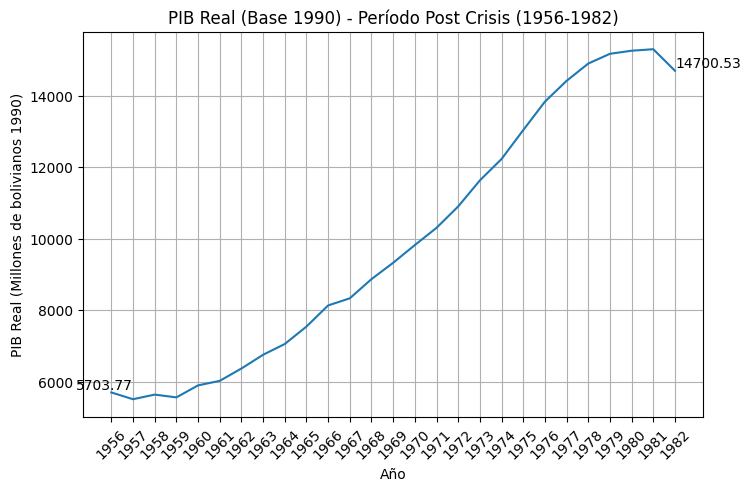

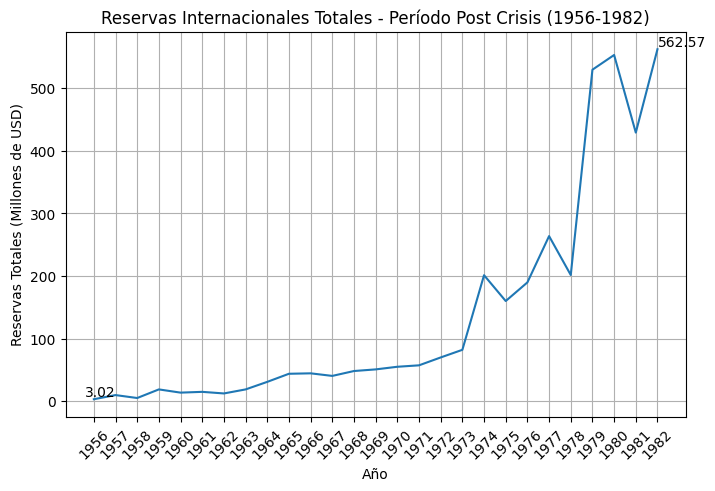

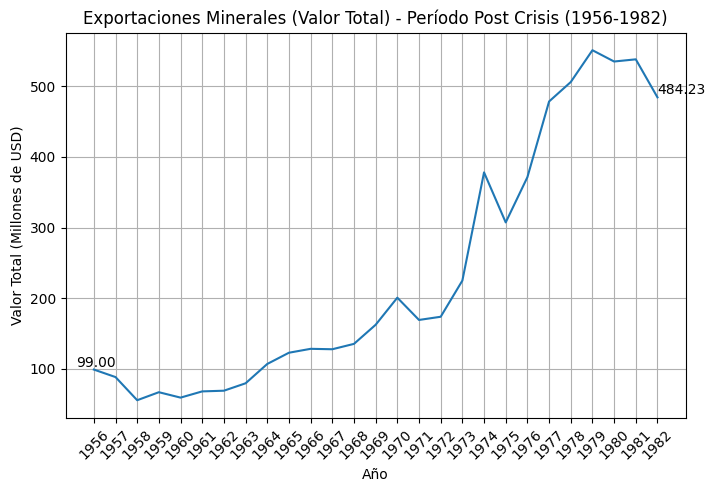

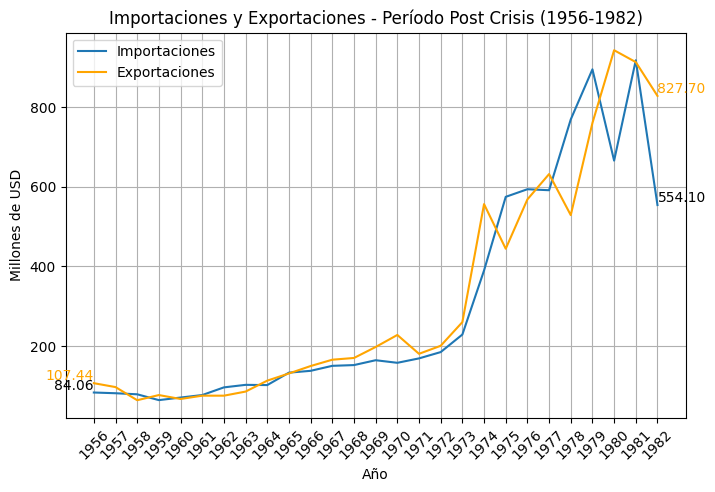

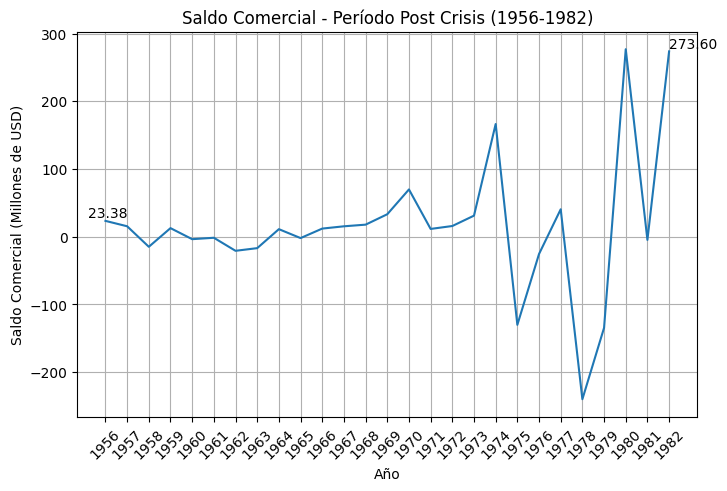

In [4]:
# ----------------------------------------------------------------------------
# CARPETA 1956-1982
# ----------------------------------------------------------------------------

def add_text_inicio_fin(x_values, y_values):
    inicio = x_values[0]
    fin = x_values[-1]
    valor_inicio = y_values.iloc[0]
    valor_fin = y_values.iloc[-1]
    plt.text(inicio + 1, valor_inicio, f'{valor_inicio:.2f}',
             fontsize=10, verticalalignment='bottom', horizontalalignment='right')
    plt.text(fin, valor_fin, f'{valor_fin:.2f}',
             fontsize=10, verticalalignment='bottom', horizontalalignment='left')

# Subcarpeta post
plt.figure(figsize=(8,5))
plt.plot(df_pib_post.index, df_pib_post['pib_real_base_1990'], linestyle='-')
plt.title('PIB Real (Base 1990) - Período Post Crisis (1956-1982)')
plt.xlabel('Año')
plt.ylabel('PIB Real (Millones de bolivianos 1990)')
plt.grid(True)
plt.xticks(df_pib_post.index, rotation=45)
add_text_inicio_fin(df_pib_post.index, df_pib_post['pib_real_base_1990'])
plt.savefig(os.path.join(output_subdir_post, "PIB_Real_post.png"))
plt.show()

plt.figure(figsize=(8,5))
plt.plot(df_reservas_post.index, df_reservas_post['reservas_totales'], linestyle='-')
plt.title('Reservas Internacionales Totales - Período Post Crisis (1956-1982)')
plt.xlabel('Año')
plt.ylabel('Reservas Totales (Millones de USD)')
plt.grid(True)
plt.xticks(df_reservas_post.index, rotation=45)
add_text_inicio_fin(df_reservas_post.index, df_reservas_post['reservas_totales'])
plt.savefig(os.path.join(output_subdir_post, "Reservas_post.png"))
plt.show()

plt.figure(figsize=(8,5))
plt.plot(df_minerales_post.index, df_minerales_post['valor_total'], linestyle='-')
plt.title('Exportaciones Minerales (Valor Total) - Período Post Crisis (1956-1982)')
plt.xlabel('Año')
plt.ylabel('Valor Total (Millones de USD)')
plt.grid(True)
plt.xticks(df_minerales_post.index, rotation=45)
add_text_inicio_fin(df_minerales_post.index, df_minerales_post['valor_total'])
plt.savefig(os.path.join(output_subdir_post, "Minerales_post.png"))
plt.show()

plt.figure(figsize=(8,5))
# Importaciones
plt.plot(df_balanza_comercial_post.index, df_balanza_comercial_post['importaciones'], 
         linestyle='-', label="Importaciones")
# Exportaciones
plt.plot(df_balanza_comercial_post.index, df_balanza_comercial_post['exportaciones'], 
         linestyle='-', label="Exportaciones", color='orange')
plt.title('Importaciones y Exportaciones - Período Post Crisis (1956-1982)')
plt.xlabel('Año')
plt.ylabel('Millones de USD')
plt.legend()
plt.grid(True)
plt.xticks(df_balanza_comercial_post.index, rotation=45)

# Anotaciones importaciones
inicio_imp = df_balanza_comercial_post.index[0]
fin_imp = df_balanza_comercial_post.index[-1]
valor_inicio_imp = df_balanza_comercial_post['importaciones'].iloc[0]
valor_fin_imp = df_balanza_comercial_post['importaciones'].iloc[-1]
plt.text(inicio_imp, valor_inicio_imp, f'{valor_inicio_imp:.2f}', fontsize=10,
         verticalalignment='bottom', horizontalalignment='right')
plt.text(fin_imp, valor_fin_imp, f'{valor_fin_imp:.2f}', fontsize=10,
         verticalalignment='bottom', horizontalalignment='left')

# Anotaciones exportaciones
inicio_exp = df_balanza_comercial_post.index[0]
fin_exp = df_balanza_comercial_post.index[-1]
valor_inicio_exp = df_balanza_comercial_post['exportaciones'].iloc[0]
valor_fin_exp = df_balanza_comercial_post['exportaciones'].iloc[-1]
plt.text(inicio_exp, valor_inicio_exp, f'{valor_inicio_exp:.2f}', fontsize=10,
         color='orange', verticalalignment='bottom', horizontalalignment='right')
plt.text(fin_exp, valor_fin_exp, f'{valor_fin_exp:.2f}', fontsize=10,
         color='orange', verticalalignment='bottom', horizontalalignment='left')

plt.savefig(os.path.join(output_subdir_post, "Importaciones_Exportaciones_post.png"))
plt.show()

plt.figure(figsize=(8,5))
plt.plot(df_balanza_comercial_post.index, df_balanza_comercial_post['saldo_comercial'], linestyle='-')
plt.title('Saldo Comercial - Período Post Crisis (1956-1982)')
plt.xlabel('Año')
plt.ylabel('Saldo Comercial (Millones de USD)')
plt.grid(True)
plt.xticks(df_balanza_comercial_post.index, rotation=45)
add_text_inicio_fin(df_balanza_comercial_post.index, df_balanza_comercial_post['saldo_comercial'])
plt.savefig(os.path.join(output_subdir_post, "Saldo_Comercial_post.png"))
plt.show()

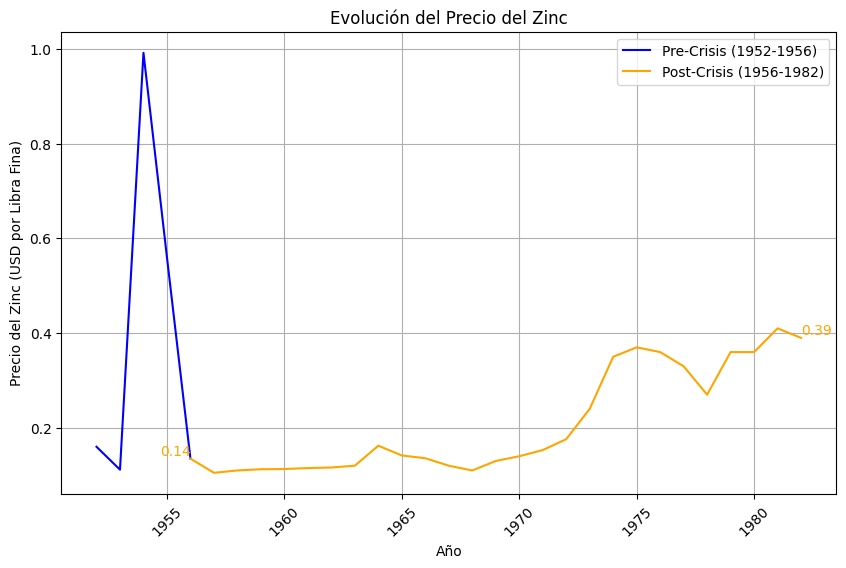

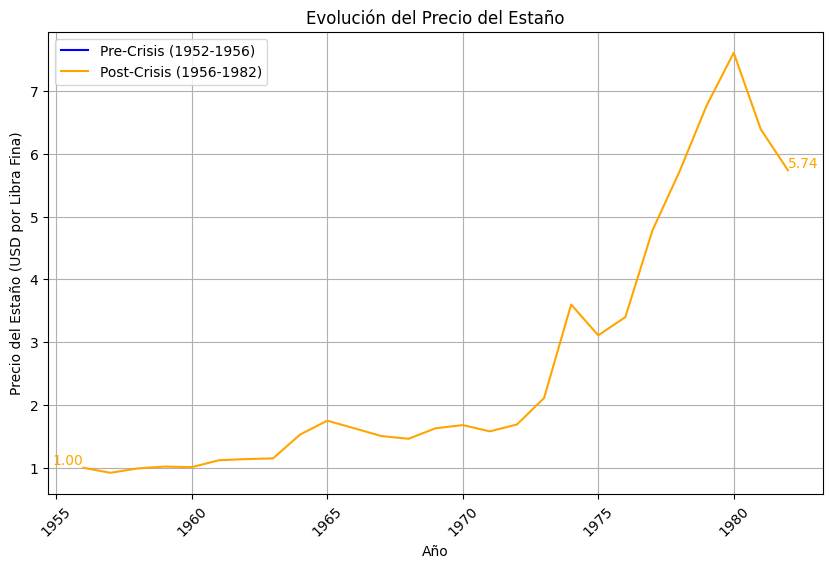

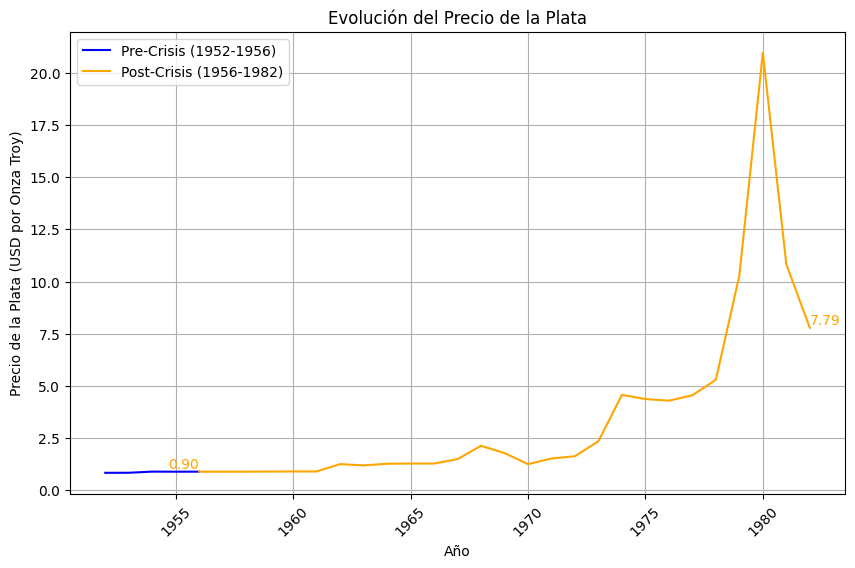

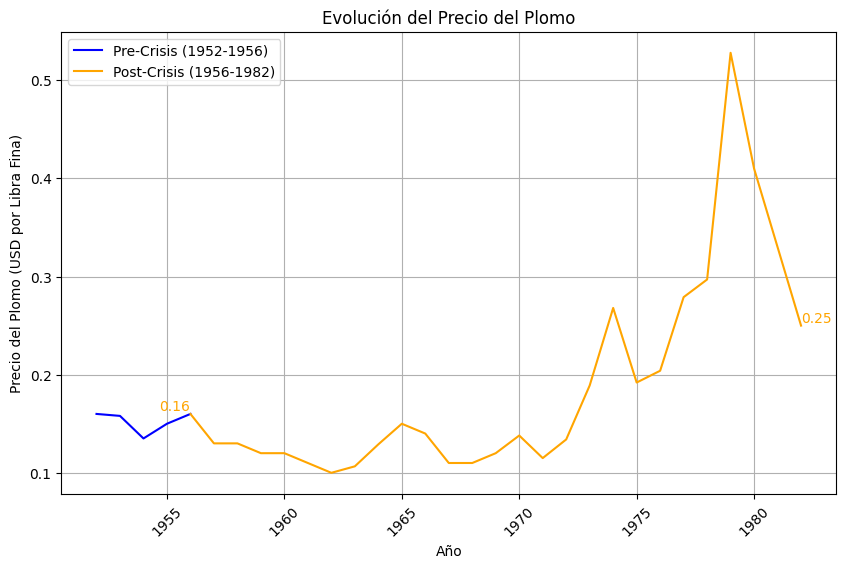

In [5]:

# Función auxiliar para anotar el primer y último punto
def add_text_points(x_values, y_values, color):
    plt.text(x_values[0], y_values.iloc[0],
             f'{y_values.iloc[0]:.2f}',
             fontsize=10, color=color,
             verticalalignment='bottom', horizontalalignment='right')
    plt.text(x_values[-1], y_values.iloc[-1],
             f'{y_values.iloc[-1]:.2f}',
             fontsize=10, color=color,
             verticalalignment='bottom', horizontalalignment='left')
# ----------------------------------------------------------------------------
# Gráfico 1: Evolución del Precio del Zinc
# ----------------------------------------------------------------------------

plt.figure(figsize=(10,6))
# Línea Pre Crisis (1952-1956) en azul
plt.plot(df_precios_pre.index, df_precios_pre['zinc'] ,
         linestyle='-', color='blue', label='Pre-Crisis (1952-1956)')
# Línea Post Crisis (1956-1982) en naranja
plt.plot(df_precios_post.index, df_precios_post['zinc'] ,
         linestyle='-', color='orange', label='Post-Crisis (1956-1982)')
plt.title("Evolución del Precio del Zinc")
plt.xlabel("Año")
plt.ylabel("Precio del Zinc (USD por Libra Fina)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)


add_text_points(df_precios_post.index, df_precios_post['zinc'], color='orange')

plt.savefig(os.path.join(output_dir, "Evolucion_Precio_Zinc.png"))
plt.show()

# ----------------------------------------------------------------------------
# Gráfico 2: Evolución del Precio del Estaño
# ----------------------------------------------------------------------------

plt.figure(figsize=(10,6))
plt.plot(df_precios_pre.index, df_precios_pre['estaño'] ,
         linestyle='-', color='blue', label='Pre-Crisis (1952-1956)')
plt.plot(df_precios_post.index, df_precios_post['estaño'] ,
         linestyle='-', color='orange', label='Post-Crisis (1956-1982)')
plt.title("Evolución del Precio del Estaño")
plt.xlabel("Año")
plt.ylabel("Precio del Estaño (USD por Libra Fina)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

add_text_points(df_precios_post.index, df_precios_post['estaño'], color='orange')

plt.savefig(os.path.join(output_dir, "Evolucion_Precio_Estaño.png"))
plt.show()

# ----------------------------------------------------------------------------
# Gráfico 3: Evolución del Precio de la Plata
# ----------------------------------------------------------------------------

plt.figure(figsize=(10,6))
plt.plot(df_precios_pre.index, df_precios_pre['plata'] ,
         linestyle='-', color='blue', label='Pre-Crisis (1952-1956)')
plt.plot(df_precios_post.index, df_precios_post['plata'] ,
         linestyle='-', color='orange', label='Post-Crisis (1956-1982)')
plt.title("Evolución del Precio de la Plata")
plt.xlabel("Año")
plt.ylabel("Precio de la Plata (USD por Onza Troy)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

add_text_points(df_precios_post.index, df_precios_post['plata'], color='orange')

plt.savefig(os.path.join(output_dir, "Evolucion_Precio_Plata.png"))
plt.show()

# ----------------------------------------------------------------------------
# Gráfico 4: Evolución del Precio del Plomo
# ----------------------------------------------------------------------------

plt.figure(figsize=(10,6))
plt.plot(df_precios_pre.index, df_precios_pre['plomo'],
         linestyle='-', color='blue', label='Pre-Crisis (1952-1956)')
plt.plot(df_precios_post.index, df_precios_post['plomo'],
         linestyle='-', color='orange', label='Post-Crisis (1956-1982)')
plt.title("Evolución del Precio del Plomo")
plt.xlabel("Año")
plt.ylabel("Precio del Plomo (USD por Libra Fina)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)


add_text_points(df_precios_post.index, df_precios_post['plomo'], color='orange')

plt.savefig(os.path.join(output_dir, "Evolucion_Precio_Plomo.png"))
plt.show()

In [6]:
# Crear diccionario para guardar los resultados
comparacion = {}

# --- PIB Real ---
pib_pre = df_pib_pre['pib_real_base_1990']
pib_post = df_pib_post['pib_real_base_1990']

comparacion['PIB Real'] = {
    'media_pre': pib_pre.mean(),
    'media_post': pib_post.mean(),
    'std_pre': pib_pre.std(),
    'std_post': pib_post.std(),
    'min_pre': pib_pre.min(),
    'min_post': pib_post.min(),
    'max_pre': pib_pre.max(),
    'max_post': pib_post.max(),
    'cv_pre': pib_pre.std() / pib_pre.mean(),
    'cv_post': pib_post.std() / pib_post.mean()
}

# --- Reservas Internacionales ---
res_pre = df_reservas_pre['reservas_totales']
res_post = df_reservas_post['reservas_totales']

comparacion['Reservas'] = {
    'media_pre': res_pre.mean(),
    'media_post': res_post.mean(),
    'std_pre': res_pre.std(),
    'std_post': res_post.std(),
    'min_pre': res_pre.min(),
    'min_post': res_post.min(),
    'max_pre': res_pre.max(),
    'max_post': res_post.max(),
    'cv_pre': res_pre.std() / res_pre.mean(),
    'cv_post': res_post.std() / res_post.mean()
}

# --- Exportaciones Minerales ---
exp_pre = df_minerales_pre['valor_total']  # convertir a millones
exp_post = df_minerales_post['valor_total'] 

comparacion['Exportaciones Minerales (Mill USD)'] = {
    'media_pre': exp_pre.mean(),
    'media_post': exp_post.mean(),
    'std_pre': exp_pre.std(),
    'std_post': exp_post.std(),
    'min_pre': exp_pre.min(),
    'min_post': exp_post.min(),
    'max_pre': exp_pre.max(),
    'max_post': exp_post.max(),
    'cv_pre': exp_pre.std() / exp_pre.mean(),
    'cv_post': exp_post.std() / exp_post.mean()
}

# Convertir a DataFrame para mostrar tabla
df_comparacion = pd.DataFrame(comparacion).T.round(2)
df_comparacion

,media_pre,media_post,std_pre,std_post,min_pre,min_post,max_pre,max_post,cv_pre,cv_post
PIB Real,5893.53,9937.72,262.14,3598.95,5656.05,5514.73,6276.99,15303.29,0.04,0.36
Reservas,17.03,137.37,10.35,177.72,3.02,3.02,28.62,562.57,0.61,1.29
Exportaciones Minerales (Mill USD),107.02,232.85,17.56,176.27,93.90,55.59,137.00,550.94,0.16,0.76


In [7]:
import matplotlib.pyplot as plt
from pandas.plotting import table

# Crear figura
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')  # Oculta ejes

# Agregar tabla al gráfico
tabla = table(ax, df_comparacion, loc='center', cellLoc='center')
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.2)

# Guardar como imagen
plt.savefig("comparacion_indicadores.png", bbox_inches='tight', dpi=300)
plt.close()